In [1]:
import gudhi as gd
from gudhi import representations
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from collections import defaultdict
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import paired_distances
from tqdm.notebook import tqdm
import scipy.spatial.distance as spdists
#from curlyBrace import curlyBrace
%matplotlib inline
from purepyECP import *
from bifiltration_utils import plot_ECP, difference_ECP, wasserstein_distance_ECP, bottleneck_distance_ECP
from pyEulerCurves import ECC_from_pointcloud


In [9]:
n=20
rv_uniform = st.uniform()
rv_beta = st.beta(3,3)
d = 2
steps = 1001
maxfilt = 3
radii = np.linspace(0,maxfilt,steps)
samplesUxU = np.array([rv_uniform.rvs(n), rv_uniform.rvs(n)]).T
samplesBxB = np.array([rv_beta.rvs(n), rv_beta.rvs(n)]).T

In [10]:
def gaussian_density2(points, witnesses, sigma):
    distance_matrix = scipy.spatial.distance_matrix(points, witnesses)
    
    gaussian_density = [np.sum(np.exp(-1*np.square(row) / (2*sigma))) for row in distance_matrix]
    
    return gaussian_density/np.sum(gaussian_density)

In [11]:
ECP_pointsUxU_codensUxU = compute_local_contributions(point_cloud=samplesUxU, epsilon = 1,vertex_filtrations=gaussian_density2(samplesUxU,samplesUxU, sigma = 1))
ECP_pointsUxU_codensBxB = compute_local_contributions(point_cloud=samplesUxU, epsilon = 1,vertex_filtrations=gaussian_density2(samplesUxU,samplesBxB, sigma = 1))
ECP_pointsBxB_codensUxU = compute_local_contributions(point_cloud=samplesBxB, epsilon = 1,vertex_filtrations=gaussian_density2(samplesBxB,samplesUxU, sigma = 1))
ECP_pointsBxB_codensBxB = compute_local_contributions(point_cloud=samplesBxB, epsilon = 1,vertex_filtrations=gaussian_density2(samplesBxB,samplesBxB, sigma = 1))

Text(0.5, 1.0, 'pts = B, wit = B')

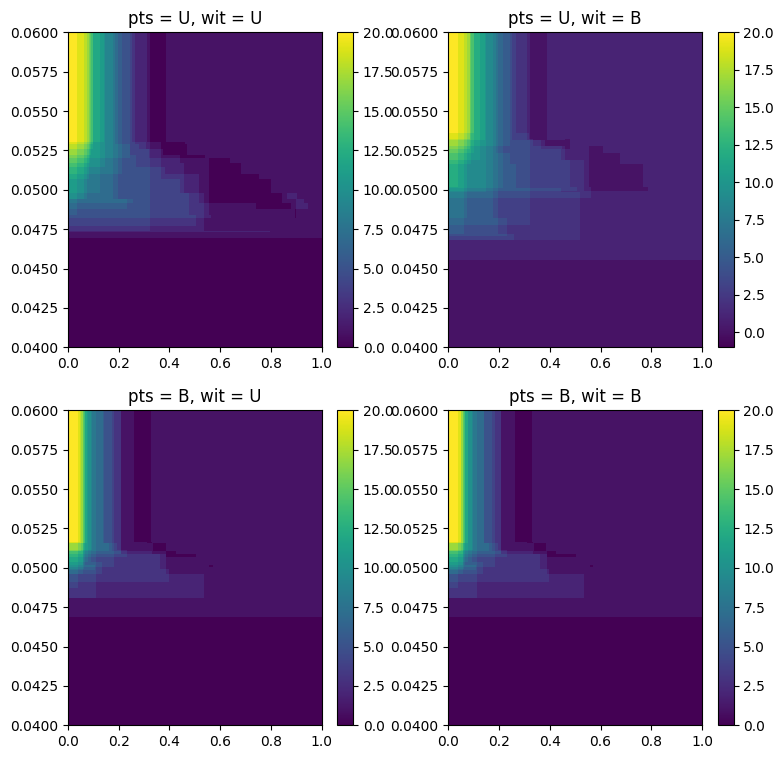

In [12]:
f,ax = plt.subplots(2,2, figsize = (9,9))
plot_ECP(ECP_pointsUxU_codensUxU[0],dims = [0,1,0.04,0.06],this_ax=ax[0,0],colorbar=True)
plot_ECP(ECP_pointsUxU_codensBxB[0],dims = [0,1,0.04,0.06],this_ax=ax[0,1],colorbar=True)
plot_ECP(ECP_pointsBxB_codensUxU[0],dims = [0,1,0.04,0.06],this_ax=ax[1,0],colorbar=True)
plot_ECP(ECP_pointsBxB_codensUxU[0],dims = [0,1,00.04,0.06],this_ax=ax[1,1],colorbar=True)

ax[0][0].set_title('pts = U, wit = U')
ax[0][1].set_title('pts = U, wit = B')
ax[1][0].set_title('pts = B, wit = U')
ax[1][1].set_title('pts = B, wit = B')

In [13]:
print(difference_ECP(ECP_pointsUxU_codensUxU[0],[],[0,1,0.04,0.06]))
print(difference_ECP(ECP_pointsUxU_codensBxB[0],[],[0,1,0.04,0.06]))
print(difference_ECP(ECP_pointsBxB_codensUxU[0],[],[0,1,0.04,0.06]))
print(difference_ECP(ECP_pointsBxB_codensBxB[0],[],[0,1,0.04,0.06]))

print(wasserstein_distance_ECP(ECP_pointsUxU_codensUxU[0], ECP_pointsUxU_codensBxB[0]))
print(bottleneck_distance_ECP(ECP_pointsUxU_codensUxU[0], ECP_pointsUxU_codensBxB[0]))

0.044840277347307354
0.045660690258196815
0.03328891348775301
0.033532791906010266
0.07727395817953445
0.002396976490434459


In [14]:
ecc = ECC_from_pointcloud(epsilon=1.5)
ecc.fit(samplesUxU)
ECC_U = ecc.transform(samplesUxU)
ECC_B = ecc.fit_transform(samplesBxB)
from pyEulerCurves import ecc_VR
pyECC_U = ecc_VR.compute_local_contributions(samplesUxU, epsilon=1.5)
pyECC_B = ecc_VR.compute_local_contributions(samplesBxB, epsilon=1.5)
print(pyECC_U[0])
print(pyECC_B[0])
ECC_B

[(0.0, 20), (0.036055048098196305, -1), (0.06200603536639867, -1), (0.07466097440881034, -1), (0.08338622822506273, -1), (0.08691630120864507, -1), (0.08996365683686655, -1), (0.0992725972857325, -1), (0.10001396933567717, -1), (0.1259237739653977, -1), (0.14242109447623225, -1), (0.1470224957718013, -1), (0.1773248572304694, -1), (0.1865808863773702, -1), (0.19563555360652796, -1), (0.21400515954386745, -1), (0.24274762204141934, -1), (0.2520575891932227, -1), (0.2658705415835599, -1), (0.31053052060727476, -1), (0.323460409399298, -1), (0.3879873461377015, 1)]
[(0.0, 20), (0.03916291445080896, -1), (0.04782321592311789, -1), (0.05123908585021041, -1), (0.058832031635196645, -1), (0.05919489468266039, -1), (0.061235332298079086, -1), (0.06538985299610717, -1), (0.06554325325308594, -1), (0.07556963541377111, -1), (0.07851369041608591, -1), (0.09109013290834114, -1), (0.09591622895668807, -1), (0.11226057377322468, -1), (0.13935739397331298, -1), (0.14220968964455968, -1), (0.173409993

[(0.0, 20),
 (0.03916291445080896, -1),
 (0.04782321592311789, -1),
 (0.05123908585021041, -1),
 (0.058832031635196645, -1),
 (0.05919489468266039, -1),
 (0.061235332298079086, -1),
 (0.06538985299610717, -1),
 (0.06554325325308594, -1),
 (0.07556963541377111, -1),
 (0.07851369041608591, -1),
 (0.09109013290834114, -1),
 (0.09591622895668807, -1),
 (0.11226057377322468, -1),
 (0.13935739397331298, -1),
 (0.14220968964455968, -1),
 (0.17340999339250818, -1),
 (0.18285053808037557, -1),
 (0.2078704088005664, -1),
 (0.20880558096928342, -1),
 (0.2620771060699906, -1),
 (0.3289376308356762, 1)]

In [15]:
print(wasserstein_distance_ECP(ECC_U,ECC_B))
print(bottleneck_distance_ECP(ECC_U,ECC_B))
#from pyEulerCurves.ecc_utils import difference_ECC, plot_euler_curve
#print(difference_ECC(ECC_U,ECC_B,max_f=1.5))
#print(len(np.array(ECP_pointsBxB_codensBxB[0][0][0]).shape))
#print(np.array(ECC_B[0][0]).reshape(-1))

1.0627692090811067
0.10172493963799134


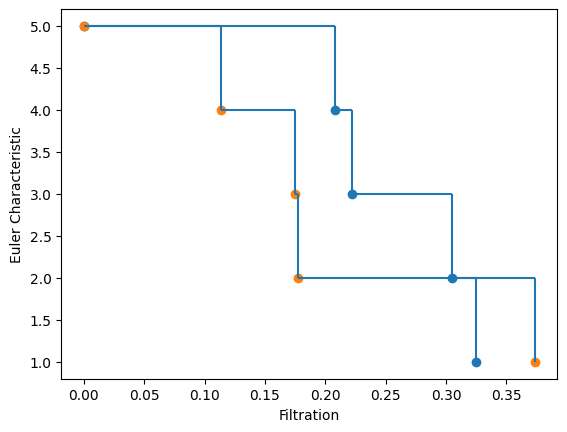

In [34]:
f,ax= plt.subplots()
plot_euler_curve(ECC_U,this_ax=ax, with_lines=True)
plot_euler_curve(ECC_B,this_ax=ax, with_lines=True)
plt.show()

In [7]:
n = 50
mc_iterations = 100

test_stat_pointsUxU_codensUxU = []
test_stat_pointsUxU_codensBxB = []
test_stat_pointsBxB_codensUxU = []
test_stat_pointsBxB_codensBxB = []


for i in range(mc_iterations):
    samplesUxU = np.array([rv_uniform.rvs(n), rv_uniform.rvs(n)]).T
    samplesBxB = np.array([rv_beta.rvs(n), rv_beta.rvs(n)]).T
    samplesUxU2 = np.array([rv_uniform.rvs(n), rv_uniform.rvs(n)]).T
    samplesBxB2 = np.array([rv_beta.rvs(n), rv_beta.rvs(n)]).T

    ECP_pointsUxU_codensUxU = compute_local_contributions(point_cloud=samplesUxU, epsilon = 1,vertex_filtrations=gaussian_density2(samplesUxU,samplesUxU2, sigma = 1))
    ECP_pointsUxU_codensBxB = compute_local_contributions(point_cloud=samplesUxU, epsilon = 1,vertex_filtrations=gaussian_density2(samplesUxU,samplesBxB2, sigma = 1))
    ECP_pointsBxB_codensUxU = compute_local_contributions(point_cloud=samplesBxB, epsilon = 1,vertex_filtrations=gaussian_density2(samplesBxB,samplesUxU2, sigma = 1))
    ECP_pointsBxB_codensBxB = compute_local_contributions(point_cloud=samplesBxB, epsilon = 1,vertex_filtrations=gaussian_density2(samplesBxB,samplesBxB2, sigma = 1))

    test_stat_pointsUxU_codensUxU.append(difference_ECP(ECP_pointsUxU_codensUxU[0],[],[0,1,0.04,0.06]))
    test_stat_pointsUxU_codensBxB.append(difference_ECP(ECP_pointsUxU_codensBxB[0],[],[0,1,0.04,0.06]))
    test_stat_pointsBxB_codensUxU.append(difference_ECP(ECP_pointsBxB_codensUxU[0],[],[0,1,0.04,0.06]))
    test_stat_pointsBxB_codensBxB.append(difference_ECP(ECP_pointsBxB_codensBxB[0],[],[0,1,0.04,0.06]))
